In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [2]:
rawdataset=np.load('new_feature_matrix.npy')

In [3]:
np.shape(rawdataset)

(90, 172, 5)

In [4]:
dataset = rawdataset.reshape(-1, rawdataset.shape[2])

In [5]:
np.shape(dataset)

(15480, 5)

In [6]:
X = dataset[:, 1:4]
y = dataset[:, 4]

In [11]:
df=pd.DataFrame(dataset)

In [12]:
df.describe()

,0,1,2,3,4
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,123.376680,43416.279070,86369.856853,276.061787,6076.995607
std,239.424092,23725.030588,35432.543742,555.064123,9649.332402
min,1.000000,1783.000000,31536.857143,0.000000,77.000000
25%,7.000000,24549.750000,63510.038690,47.465000,808.000000
50%,15.000000,39066.500000,80220.571569,124.925000,1714.500000
75%,38.000000,61487.000000,100470.470000,271.010000,6927.500000
max,1393.000000,111344.000000,243571.000000,7664.590000,156329.000000


In [17]:
df.columns=['placekey','Median_Household_Income','Total_Population','case_rate','raw_visit_counts']

In [18]:
df.describe()

,placekey,Median_Household_Income,Total_Population,case_rate,raw_visit_counts
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,123.376680,43416.279070,86369.856853,276.061787,6076.995607
std,239.424092,23725.030588,35432.543742,555.064123,9649.332402
min,1.000000,1783.000000,31536.857143,0.000000,77.000000
25%,7.000000,24549.750000,63510.038690,47.465000,808.000000
50%,15.000000,39066.500000,80220.571569,124.925000,1714.500000
75%,38.000000,61487.000000,100470.470000,271.010000,6927.500000
max,1393.000000,111344.000000,243571.000000,7664.590000,156329.000000


In [25]:
X = df.loc[:,['Median_Household_Income','Total_Population','case_rate']]
y = df.loc[:,['raw_visit_counts']]

<Axes: >

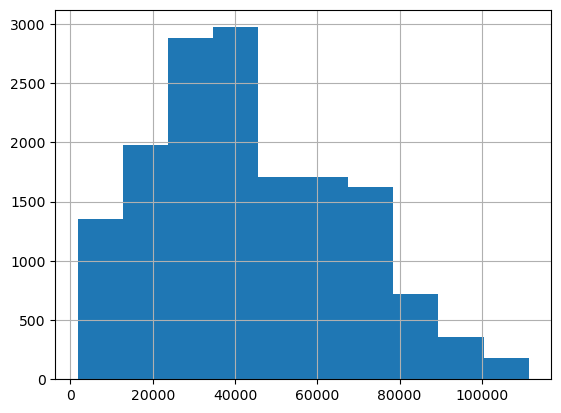

In [27]:
df['Median_Household_Income'].hist()

<Axes: >

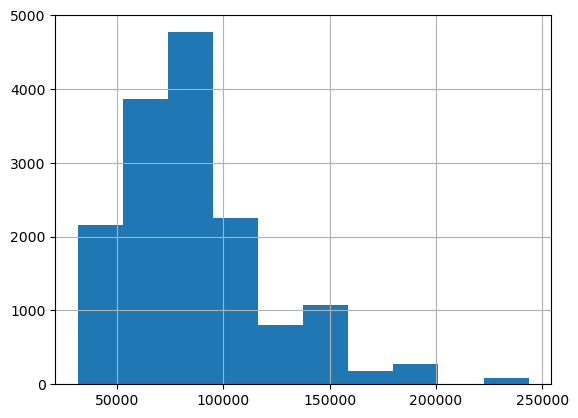

In [28]:
df['Total_Population'].hist()

<Axes: >

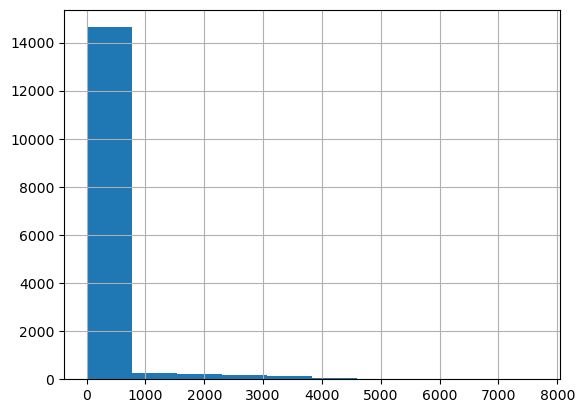

In [29]:
df['case_rate'].hist()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                          learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)


In [36]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [37]:
y_pred = xg_reg.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 8288.680643
